In [1]:
import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_DIR="../data/stl10_binary/test_X.bin"
LABEL_DIR="../data/stl10_binary/test_y.bin"

In [3]:
def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

In [4]:
def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images

In [18]:
labels = read_labels(LABEL_DIR)
labels[:100]

array([ 7,  8,  6,  1,  4,  2,  2,  2,  5,  5,  1,  1,  5,  1,  2,  6,  5,
       10,  1,  7,  6,  4,  2,  4,  3,  7,  6,  6,  3,  8,  2,  7,  4,  8,
       10,  3,  5,  8, 10,  6,  2, 10,  1,  7,  5, 10,  2,  2,  4,  3,  6,
        5,  1,  1, 10,  9,  7,  8,  3,  1,  1,  2,  2,  8, 10,  7,  2,  9,
        1,  5,  3,  2,  8,  2,  3,  8,  6,  4,  6,  8,  4,  1, 10,  4,  1,
        2,  9,  1,  3,  6,  5,  2,  4,  7,  6,  2,  8,  6,  9,  6],
      dtype=uint8)

In [7]:
images = read_all_images(DATA_DIR)

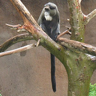

In [9]:
from PIL import Image
Image.fromarray(images[1])

In [10]:
import clip
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device, jit=False)

In [13]:
clip_preprocess(Image.fromarray(images[0])).shape

torch.Size([3, 224, 224])

In [14]:
class_file = "../data/stl10_binary/class_names.txt"

In [17]:
classes = []
with open(class_file, "r", encoding="utf-8") as f:
    for line in f.readlines():
        classes.append(line.strip())
classes

['airplane',
 'bird',
 'car',
 'cat',
 'deer',
 'dog',
 'horse',
 'monkey',
 'ship',
 'truck']